In [1]:
!pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 3.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357271 sha256=a9efd9af79a65f05d05fd945ec533d602702b0444295981d1aa0b3060c8b34a8
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


In [2]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import math
import seaborn as sns
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate
import os

In [3]:
import gdown
import pandas as pd

# File ID from Google Drive
file_url = 'https://drive.google.com/uc?id=1-vElZA5bxPzKiq41wwpM7H8LbSFuIWiC'
output_file = 'combined_data_1.txt'

# Download the file
gdown.download(file_url, output_file, quiet=False)

# Load the data
data = pd.read_csv(
    output_file,
    header=None,
    names=['Cust_Id', 'Rating'],
    usecols=[0, 1]
)

# Convert it to a DataFrame
df = pd.DataFrame(data)

# Display the first few rows to confirm the structure
print(df.head())

Downloading...
From (original): https://drive.google.com/uc?id=1-vElZA5bxPzKiq41wwpM7H8LbSFuIWiC
From (redirected): https://drive.google.com/uc?id=1-vElZA5bxPzKiq41wwpM7H8LbSFuIWiC&confirm=t&uuid=81a7d9a1-14ca-49da-bf87-af238bcb3132
To: /content/combined_data_1.txt
100%|██████████| 495M/495M [00:07<00:00, 65.5MB/s]


   Cust_Id  Rating
0       1:     NaN
1  1488844     3.0
2   822109     5.0
3   885013     4.0
4    30878     4.0


In [4]:
# Basic information
print("Dataset Info:")
print(df.info())

# Basic statistics
print("\nDataset Description:")
print(df.describe())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24058263 entries, 0 to 24058262
Data columns (total 2 columns):
 #   Column   Dtype  
---  ------   -----  
 0   Cust_Id  object 
 1   Rating   float64
dtypes: float64(1), object(1)
memory usage: 367.1+ MB
None

Dataset Description:
             Rating
count  2.405376e+07
mean   3.599634e+00
std    1.086118e+00
min    1.000000e+00
25%    3.000000e+00
50%    4.000000e+00
75%    4.000000e+00
max    5.000000e+00


In [5]:
# Count missing values per column
print("\nMissing Values:")
print(df.isnull().sum())

# Unique values in each column
print("\nUnique Values:")
print(f"Unique Customer IDs: {df['Cust_Id'].nunique()}")
print(f"Unique Ratings: {df['Rating'].nunique()}")


Missing Values:
Cust_Id       0
Rating     4499
dtype: int64

Unique Values:
Unique Customer IDs: 475257
Unique Ratings: 5


In [6]:
# Identify rows where Rating is NaN (likely indicating a movie ID row)
movie_separators = df[df['Rating'].isna()]

# Display the first few movie separators
print("\nMovie Separators (First Few):")
print(movie_separators.head())


Movie Separators (First Few):
     Cust_Id  Rating
0         1:     NaN
548       2:     NaN
694       3:     NaN
2707      4:     NaN
2850      5:     NaN


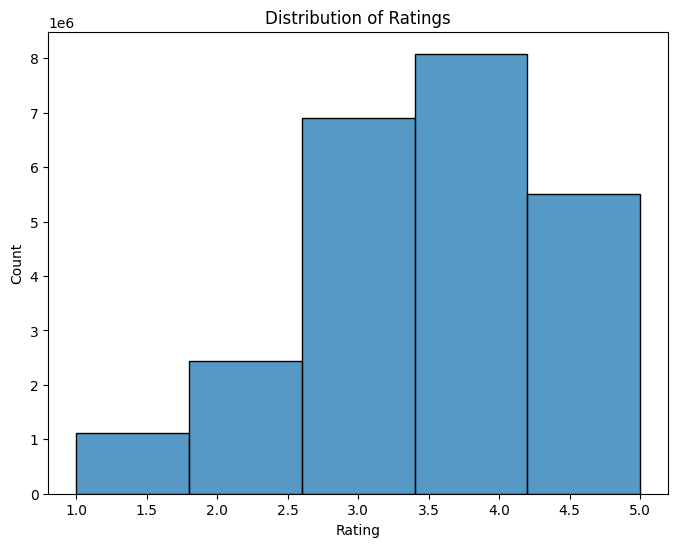

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter out movie separator rows
ratings_only = df.dropna()

# Plot distribution of ratings
plt.figure(figsize=(8, 6))
sns.histplot(ratings_only['Rating'], bins=5, kde=False)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


Ratings per Customer Statistics:
count    470758.000000
mean         51.095816
std          74.405055
min           1.000000
25%           8.000000
50%          24.000000
75%          64.000000
max        4467.000000
Name: count, dtype: float64


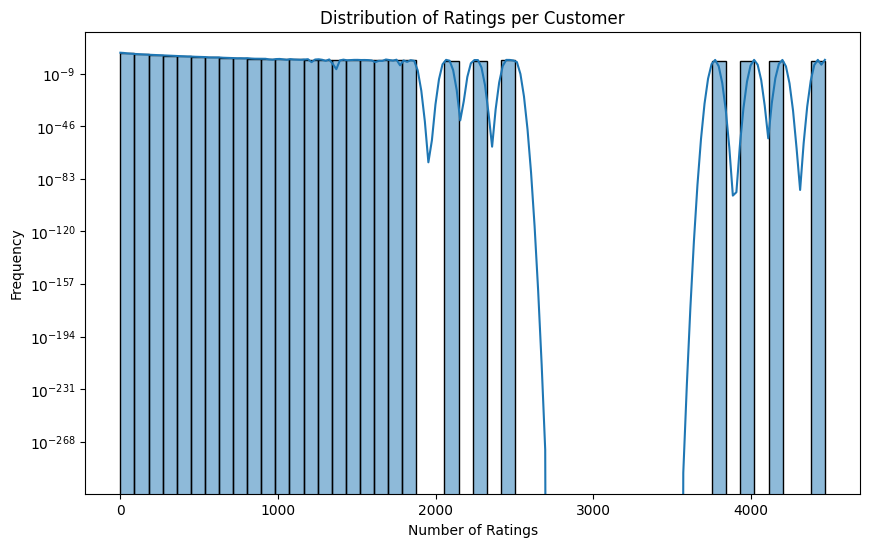

In [8]:
# Count ratings per customer
ratings_per_customer = ratings_only['Cust_Id'].value_counts()

# Display basic statistics
print("\nRatings per Customer Statistics:")
print(ratings_per_customer.describe())

# Plot distribution of ratings per customer
plt.figure(figsize=(10, 6))
sns.histplot(ratings_per_customer, bins=50, kde=True)
plt.title('Distribution of Ratings per Customer')
plt.xlabel('Number of Ratings')
plt.ylabel('Frequency')
plt.yscale('log')  # Log scale to handle skewness
plt.show()

In [9]:
import pandas as pd
import gdown

# Define the file URL and output filename
file_url = 'https://drive.google.com/uc?id=1LNdh92ktYJC4JlYFDD0E5rkNDdl4_hGp'
output_file = 'movie_titles.csv'

# Download the file
gdown.download(file_url, output_file, quiet=False)

# Load the Movie Titles dataset
df_title = pd.read_csv(
    output_file,
    encoding='ISO-8859-1',
    header=None,
    usecols=[0, 1, 2],
    names=['Movie_Id', 'Year', 'Name']
)
df_title.set_index('Movie_Id', inplace=True)

# Display the first few rows of the movie titles dataset
print("Movie Titles Dataset:")
print(df_title.head(5))

Downloading...
From: https://drive.google.com/uc?id=1LNdh92ktYJC4JlYFDD0E5rkNDdl4_hGp
To: /content/movie_titles.csv
100%|██████████| 578k/578k [00:00<00:00, 41.9MB/s]

Movie Titles Dataset:
            Year                          Name
Movie_Id                                      
1         2003.0               Dinosaur Planet
2         2004.0    Isle of Man TT 2004 Review
3         1997.0                     Character
4         1994.0  Paula Abdul's Get Up & Dance
5         2004.0      The Rise and Fall of ECW


In [10]:
# Basic information
print("Dataset Info:")
print(df_title.info())

# Basic statistics
print("\nDataset Description:")
print(df_title.describe())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 17770 entries, 1 to 17770
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    17763 non-null  float64
 1   Name    17770 non-null  object 
dtypes: float64(1), object(1)
memory usage: 416.5+ KB
None

Dataset Description:
               Year
count  17763.000000
mean    1990.263694
std       16.507891
min     1896.000000
25%     1985.000000
50%     1997.000000
75%     2002.000000
max     2005.000000


In [11]:
# Count missing values per column
print("\nMissing Values:")
print(df_title.isnull().sum())


Missing Values:
Year    7
Name    0
dtype: int64


In [12]:
# Unique values in each column
print("\nUnique Values:")
print(f"Unique Years: {df_title['Year'].nunique()}")
print(f"Unique Titles: {df_title['Name'].nunique()}")

# Check for duplicate movie names
duplicates = df_title[df_title.duplicated(subset=['Name'])]
print("\nDuplicate Titles:")
print(duplicates)


Unique Values:
Unique Years: 94
Unique Titles: 17297

Duplicate Titles:
            Year                                Name
Movie_Id                                            
305       1996.0                                Jack
379       1996.0                          Crash Dive
1015      1996.0                           Dr. Quinn
1260      1999.0  Journey to the Center of the Earth
1505      1964.0                              Hamlet
...          ...                                 ...
17658     1994.0                           The Chase
17685     1988.0                               Alice
17704     1999.0                               Taboo
17721     1998.0                     The Love Letter
17730     1958.0                            The Blob

[473 rows x 2 columns]



Year Range:
Oldest Movie Year: 1896.0
Newest Movie Year: 2005.0


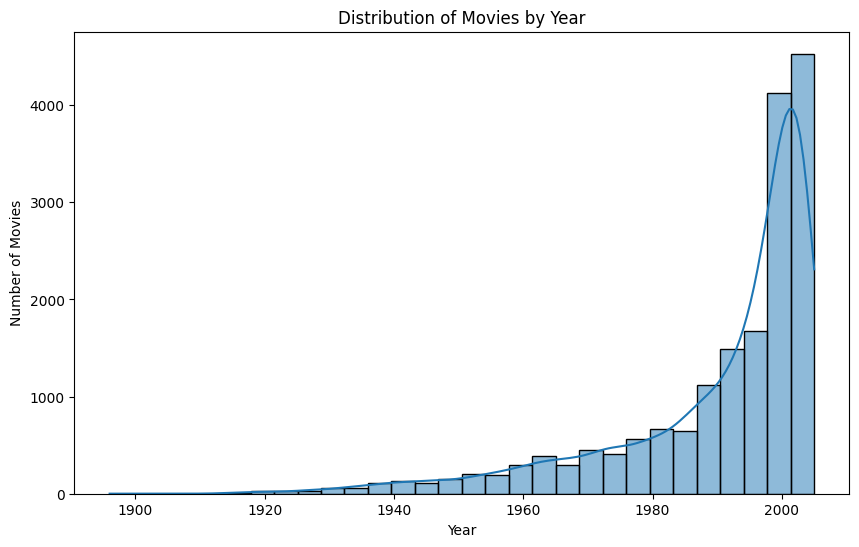

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Year range
print("\nYear Range:")
print(f"Oldest Movie Year: {df_title['Year'].min()}")
print(f"Newest Movie Year: {df_title['Year'].max()}")

# Plot distribution of movies by year
plt.figure(figsize=(10, 6))
sns.histplot(df_title['Year'].dropna(), bins=30, kde=True)
plt.title('Distribution of Movies by Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.show()

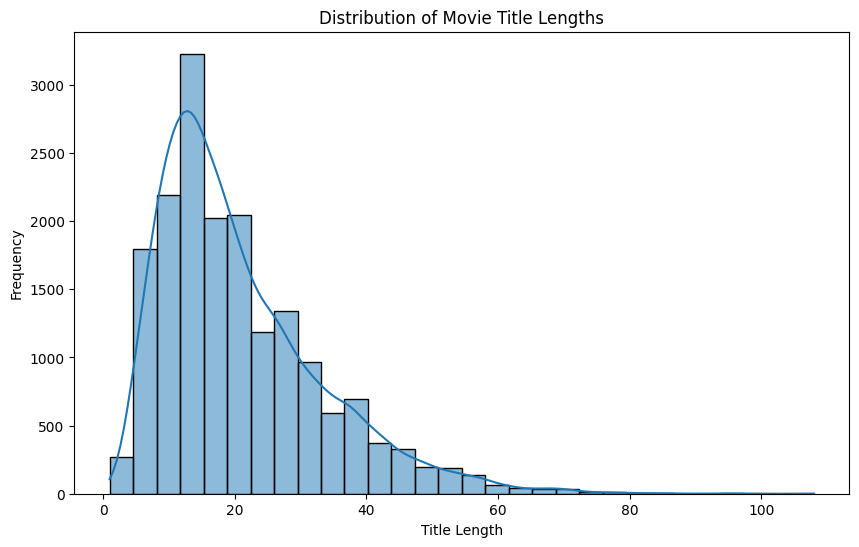


Most Common Words in Titles:
the: 6102
of: 2149
s: 1024
a: 764
and: 742
in: 742
season: 742
2: 611
1: 591
to: 422


In [14]:
# Title length
df_title['Title_Length'] = df_title['Name'].apply(lambda x: len(str(x)))

# Plot title length distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_title['Title_Length'], bins=30, kde=True)
plt.title('Distribution of Movie Title Lengths')
plt.xlabel('Title Length')
plt.ylabel('Frequency')
plt.show()

# Most common words in titles
from collections import Counter
import re

# Split titles into words and count occurrences
title_words = ' '.join(df_title['Name'].dropna().values)
title_words = re.findall(r'\w+', title_words.lower())
common_words = Counter(title_words).most_common(10)

print("\nMost Common Words in Titles:")
for word, count in common_words:
    print(f"{word}: {count}")

In [15]:
# Creating Dataframe with all movie id rows
df_nan=pd.DataFrame(pd.isnull(df.Rating))
df_nan = df_nan[df_nan['Rating']==True].reset_index()

In [16]:
# Assigning the moveid to relevant index
df['Movie_Id'] = 0
for i in range(1,len(df_nan)):
    prev_index = df_nan['index'].iloc[i-1]
    curr_index = df_nan['index'].iloc[i]
    df['Movie_Id'].iloc[prev_index:curr_index] = i
   # print(i   ,prev_index,curr_index)

In [17]:
# Removing the NaN rows as movie id is seperated
df = df[pd.notnull(df['Rating'])]
# Changing the column to int datatype
df['Movie_Id'] = df['Movie_Id'].astype(int)
df['Cust_Id'] = df['Cust_Id'].astype(int)

In [18]:
# Define the aggregation functions
agg_funcs = ['count', 'mean']

# Initialize drop lists for customer and movie ids
cust_drop_id, movie_drop_id = [], []

# Loop through the relevant columns
for col in ['Cust_Id', 'Movie_Id']:
    # Group by the column and apply the aggregation
    df_cnt = df.groupby(col)['Rating'].agg(agg_funcs)

    # Calculate the threshold value for 80th percentile of 'count'
    threshold_val = round(df_cnt['count'].quantile(0.8))

    # Assign drop ids based on the threshold
    drop_ids = df_cnt[df_cnt['count'] < threshold_val].index

    # Store drop ids in the relevant variable
    if col == 'Cust_Id':
        cust_drop_id = drop_ids
    else:
        movie_drop_id = drop_ids

    # Print the threshold value
    print(f'The threshold value for {col}: {threshold_val}')

# Remove the inactive records based on threshold values
df = df[~df['Cust_Id'].isin(cust_drop_id) & ~df['Movie_Id'].isin(movie_drop_id)]

# Optionally, print the shape after trimming
print(f'After Trim Shape: {df.shape}')

The threshold value for Cust_Id: 79
The threshold value for Movie_Id: 3884
After Trim Shape: (13528427, 3)


In [19]:

df = df[~df['Cust_Id'].isin(cust_drop_id)]
df = df[~df['Movie_Id'].isin(movie_drop_id)]


Building the Model


In [20]:
!pip install scikit-surprise
from surprise import Reader, Dataset

In [21]:
# Reader to read the data
reader = Reader()
# Taking only 100000 for modeling
data=Dataset.load_from_df(df[['Cust_Id','Movie_Id','Rating']][:10000], reader)

In [22]:
# Initiate the Model
model_svd = SVD()
# Check Cross Validation
cross_validate(model_svd,data, measures=['RMSE','MAE'],verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.2053  1.2320  1.1928  1.2062  1.2024  1.2077  0.0130  
MAE (testset)     0.9796  0.9979  0.9609  0.9754  0.9572  0.9742  0.0145  
Fit time          0.36    0.20    0.16    0.16    0.17    0.21    0.08    
Test time         0.01    0.01    0.01    0.01    0.01    0.01    0.00    


{'test_rmse': array([1.20534507, 1.23198153, 1.19279515, 1.20616374, 1.20241101]),
 'test_mae': array([0.9795764 , 0.99791924, 0.96091833, 0.97542303, 0.95720001]),
 'fit_time': (0.360736608505249,
  0.20276951789855957,
  0.16362357139587402,
  0.15939831733703613,
  0.16825270652770996),
 'test_time': (0.012633085250854492,
  0.009465694427490234,
  0.008872032165527344,
  0.008763790130615234,
  0.009317159652709961)}

In [23]:
# Filter the movies liked by user 785314 with rating 5
df_user_1028463_liked = df[(df['Cust_Id'] == 1028463) & (df['Rating'] == 5)]

# Merge the dataset with movie titles
df_user_1028463_liked = df_user_1028463_liked.merge(df_title, left_on='Movie_Id', right_index=True)

# Sort the movies by Movie_Id or Rating (if needed) and take the top 10
df_user_1028463_liked_sorted = df_user_1028463_liked.sort_values(by='Rating', ascending=False).head(10)

# Display the top 10 movies liked by the user
print(df_user_1028463_liked_sorted[['Movie_Id', 'Name', 'Rating']])

          Movie_Id                         Name  Rating
123185          30       Something's Gotta Give     5.0
16487323      3192                Double Impact     5.0
16451404      3174             Stealing Harvard     5.0
16401522      3165      Dirty Rotten Scoundrels     5.0
16249406      3151            Napoleon Dynamite     5.0
16170318      3147   The Twilight Zone: Vol. 25     5.0
16096852      3128                      Starman     5.0
16061567      3113                 Dante's Peak     5.0
15912120      3102              Damien: Omen II     5.0
15891917      3098  Three Men and a Little Lady     5.0


In [24]:
# Copy the movie titles dataframe and reset the index
df_user_1028463_recomended = df_title[~df_title.index.isin(movie_drop_id)].reset_index()

# Display the result
print(df_user_1028463_recomended.head())

   Movie_Id    Year                        Name  Title_Length
0         8  2004.0  What the #$*! Do We Know!?            26
1        17  2005.0                   7 Seconds             9
2        18  1994.0            Immortal Beloved            16
3        26  2004.0             Never Die Alone            15
4        28  2002.0             Lilo and Stitch            15


In [25]:
full_data = Dataset.load_from_df(df[['Cust_Id','Movie_Id','Rating']],reader)

In [26]:
train_data = full_data.build_full_trainset()
model_svd.fit(train_data)

In [27]:
# Create an empty list to store the predicted scores
estimate_scores = []

# Loop through each movie ID and predict the score
for movie_id in df_user_1028463_recomended['Movie_Id']:
    estimate_score = model_svd.predict(1028463, movie_id).est
    estimate_scores.append(estimate_score)

# Add the 'Estimate_score' column to the DataFrame
df_user_1028463_recomended['Estimate_score'] = estimate_scores

In [28]:
df_user_1028463_recomended.sort_values('Estimate_score', ascending=False)

,Movie_Id,Year,Name,Title_Length,Estimate_score
17,118,1985.0,Rambo: First Blood Part II,26,5.000000
356,1798,1987.0,Lethal Weapon,13,5.000000
301,1558,1990.0,Rocky V,7,5.000000
727,3610,1992.0,Lethal Weapon 3,15,5.000000
795,3938,2004.0,Shrek 2,7,5.000000
...,...,...,...,...,...
561,2813,2004.0,Bad Education,13,1.084928
115,554,1972.0,Solaris,7,1.009554
847,4237,2002.0,Morvern Callar,14,1.000000
41,248,2001.0,Michael Moore's The Awful Truth: Season 2,41,1.000000
